In [2]:
# import necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from torchvision import datasets, models, transforms
import os
import torch
import torch.nn as nn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [3]:
pd.pandas.set_option('display.max_columns', None)

url = 'https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv'
df = pd.read_csv(url)


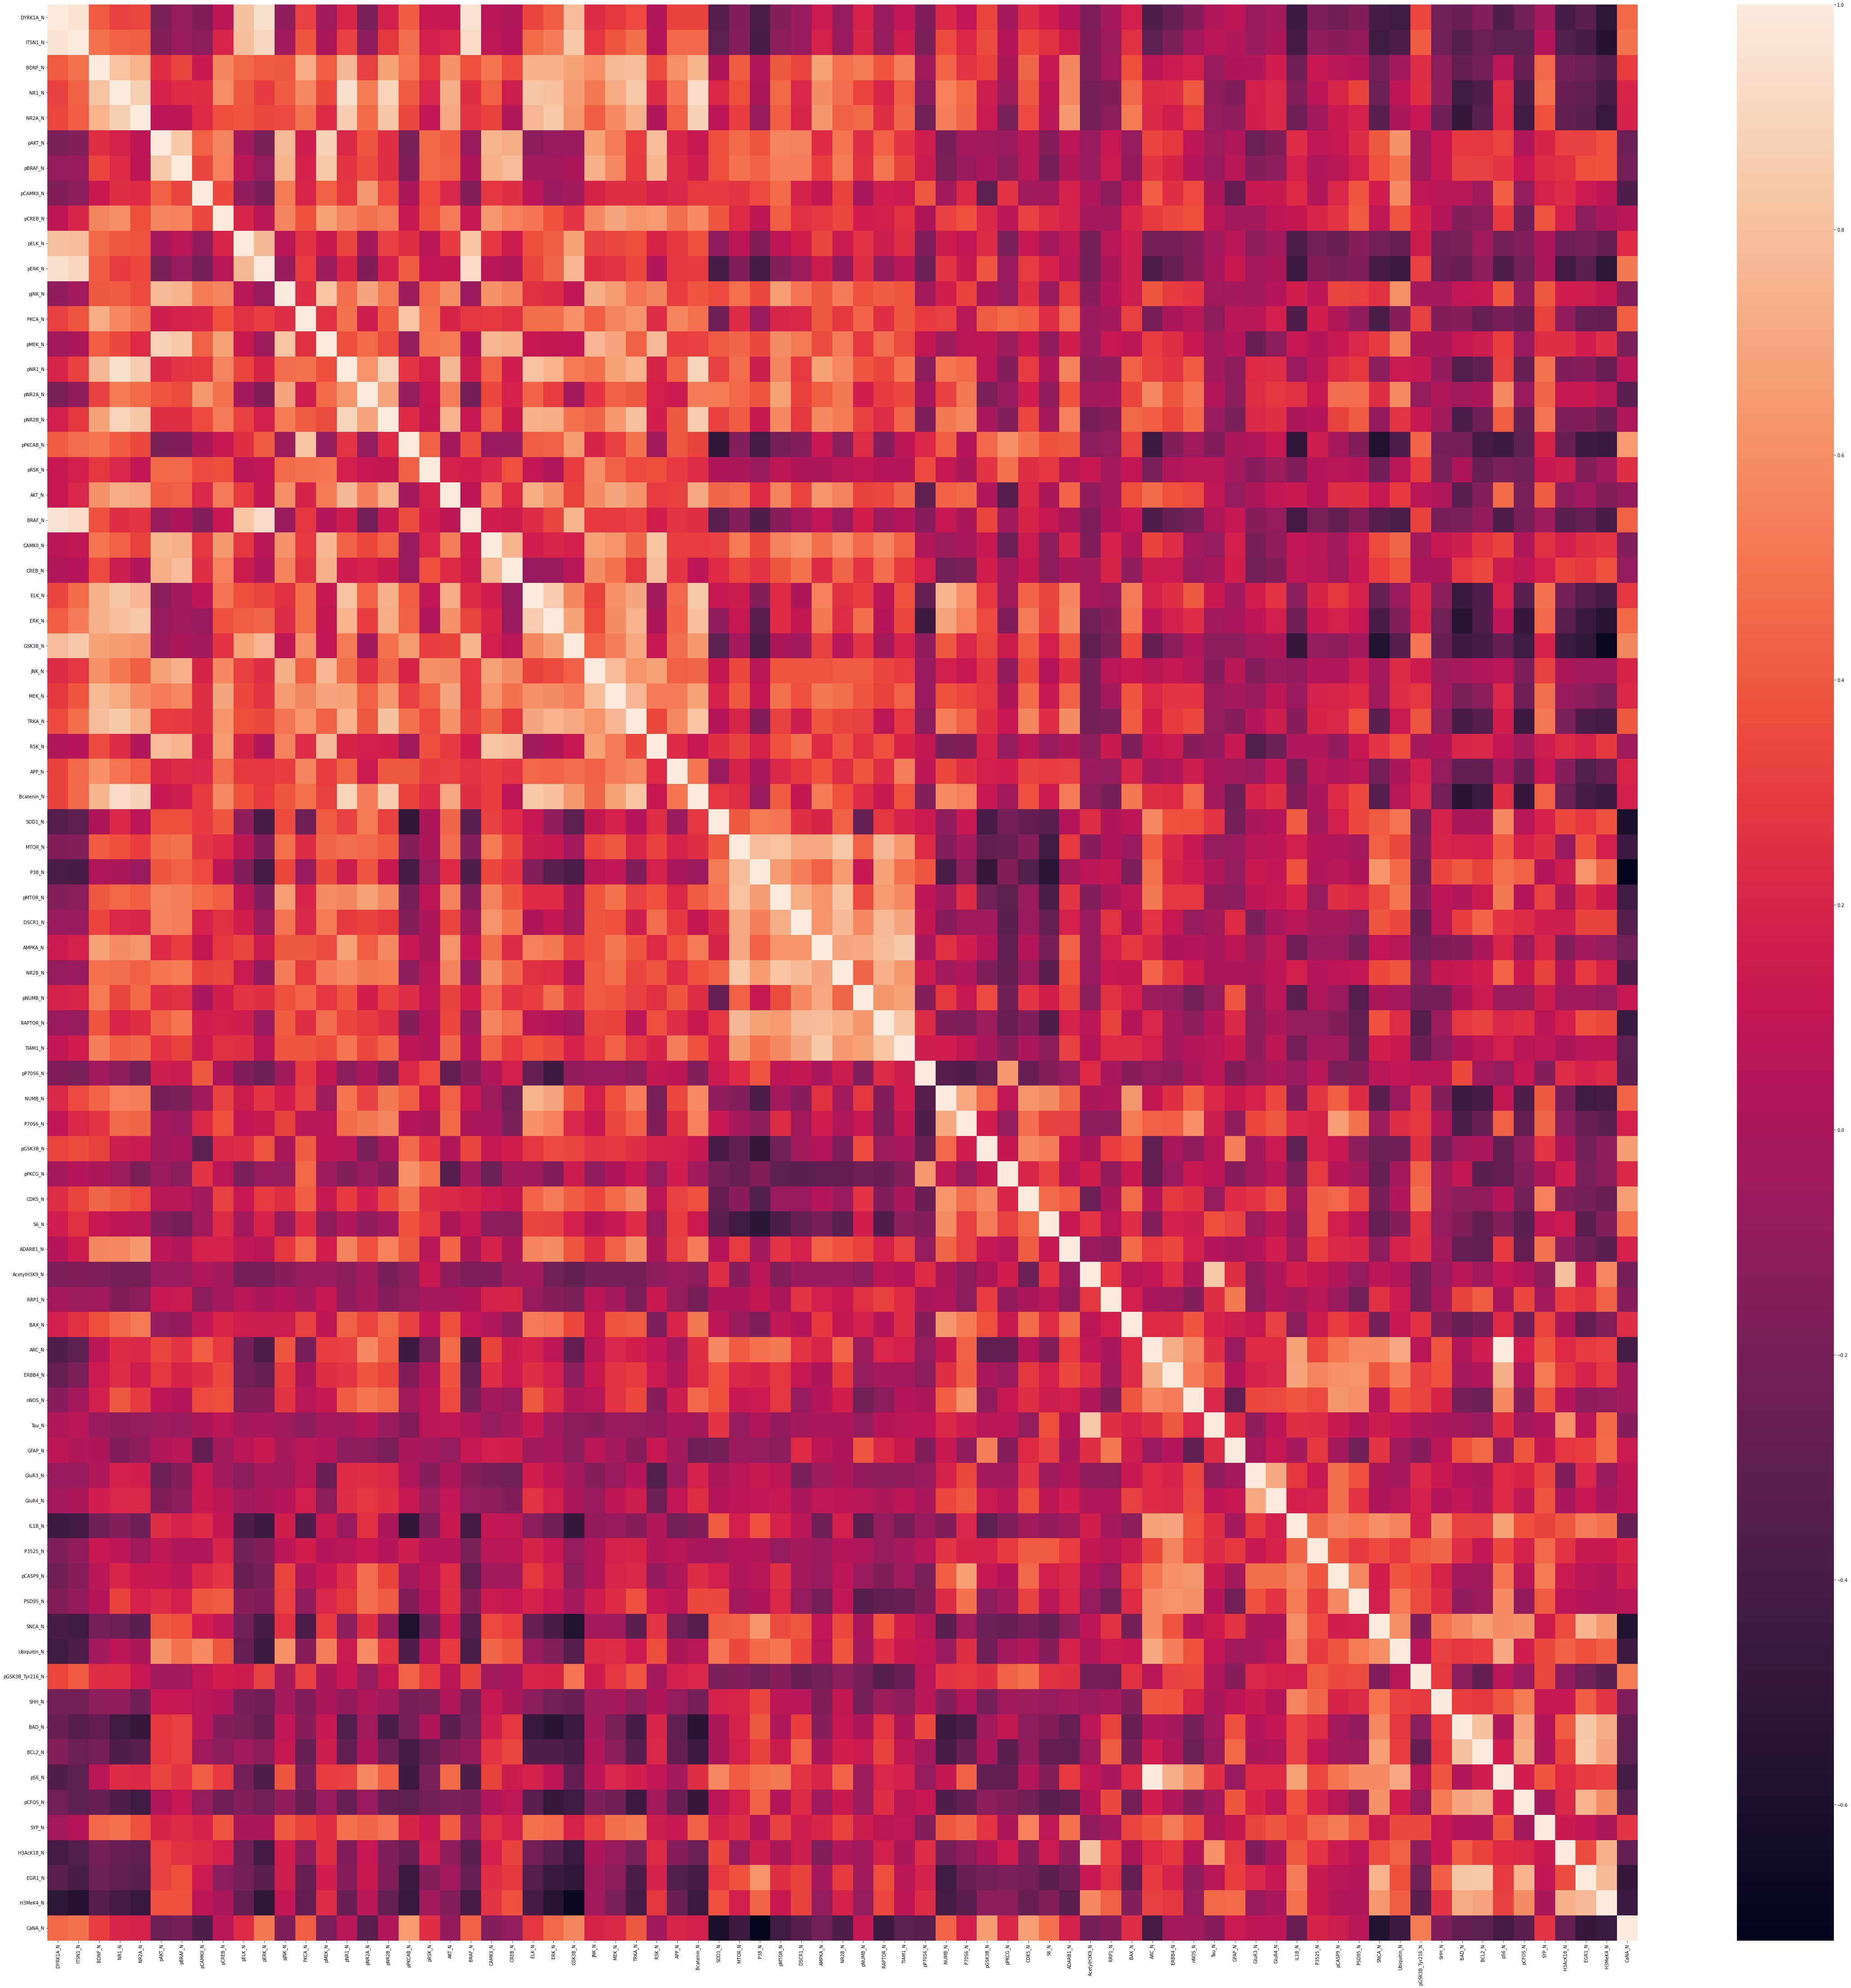

In [4]:
sample_count, feature_count = df.shape
plt.rcParams['figure.figsize']=(feature_count, feature_count)
sns.heatmap(df.corr())
plt.show()

### 2. Perform exploratory data analysis to find out: [3]
a. Which variables are usable, and which are not?

b. Are there significant correlations among variables?

c. Are the classes balanced?

In [4]:
# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Set the threshold
threshold = 0.7

# Identify highly correlated features
high_corr_features = np.where(corr_matrix > threshold)

# Remove highly correlated features
high_corr_features = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]
for feature in high_corr_features:
    df.drop(feature[1], axis=1 ,inplace=True ,errors='ignore')
    
# Print the modified dataset
#print(df)


     DYRK1A_N    BDNF_N    pAKT_N  pCAMKII_N   pCREB_N   pNR2A_N    pRSK_N  \
0    0.503644  0.430175  0.218830   2.373744  0.232224  0.605673  0.441599   
1    0.514617  0.411770  0.211636   2.292150  0.226972  0.587559  0.445222   
2    0.509183  0.418309  0.209011   2.283337  0.230247  0.602449  0.467668   
3    0.442107  0.358626  0.222886   2.152301  0.207004  0.520293  0.477671   
4    0.434940  0.358802  0.213106   2.134014  0.192158  0.507990  0.483416   
..        ...       ...       ...        ...       ...       ...       ...   
757  0.394169  0.316564  0.234529   3.208804  0.221809  0.666857  0.499929   
758  0.401739  0.321841  0.236546   3.384350  0.231899  0.709489  0.536801   
759  0.382182  0.318545  0.259636   3.006364  0.223455  0.657636  0.510545   
760  0.365622  0.297992  0.245333   2.948221  0.217506  0.649172  0.490490   
761  0.365605  0.301539  0.248568   3.069435  0.226736  0.660165  0.532749   

        APP_N    SOD1_N    MTOR_N   AMPKA_N  pP70S6_N  pGSK3B_N

In [5]:
sample_count, feature_count = df.shape

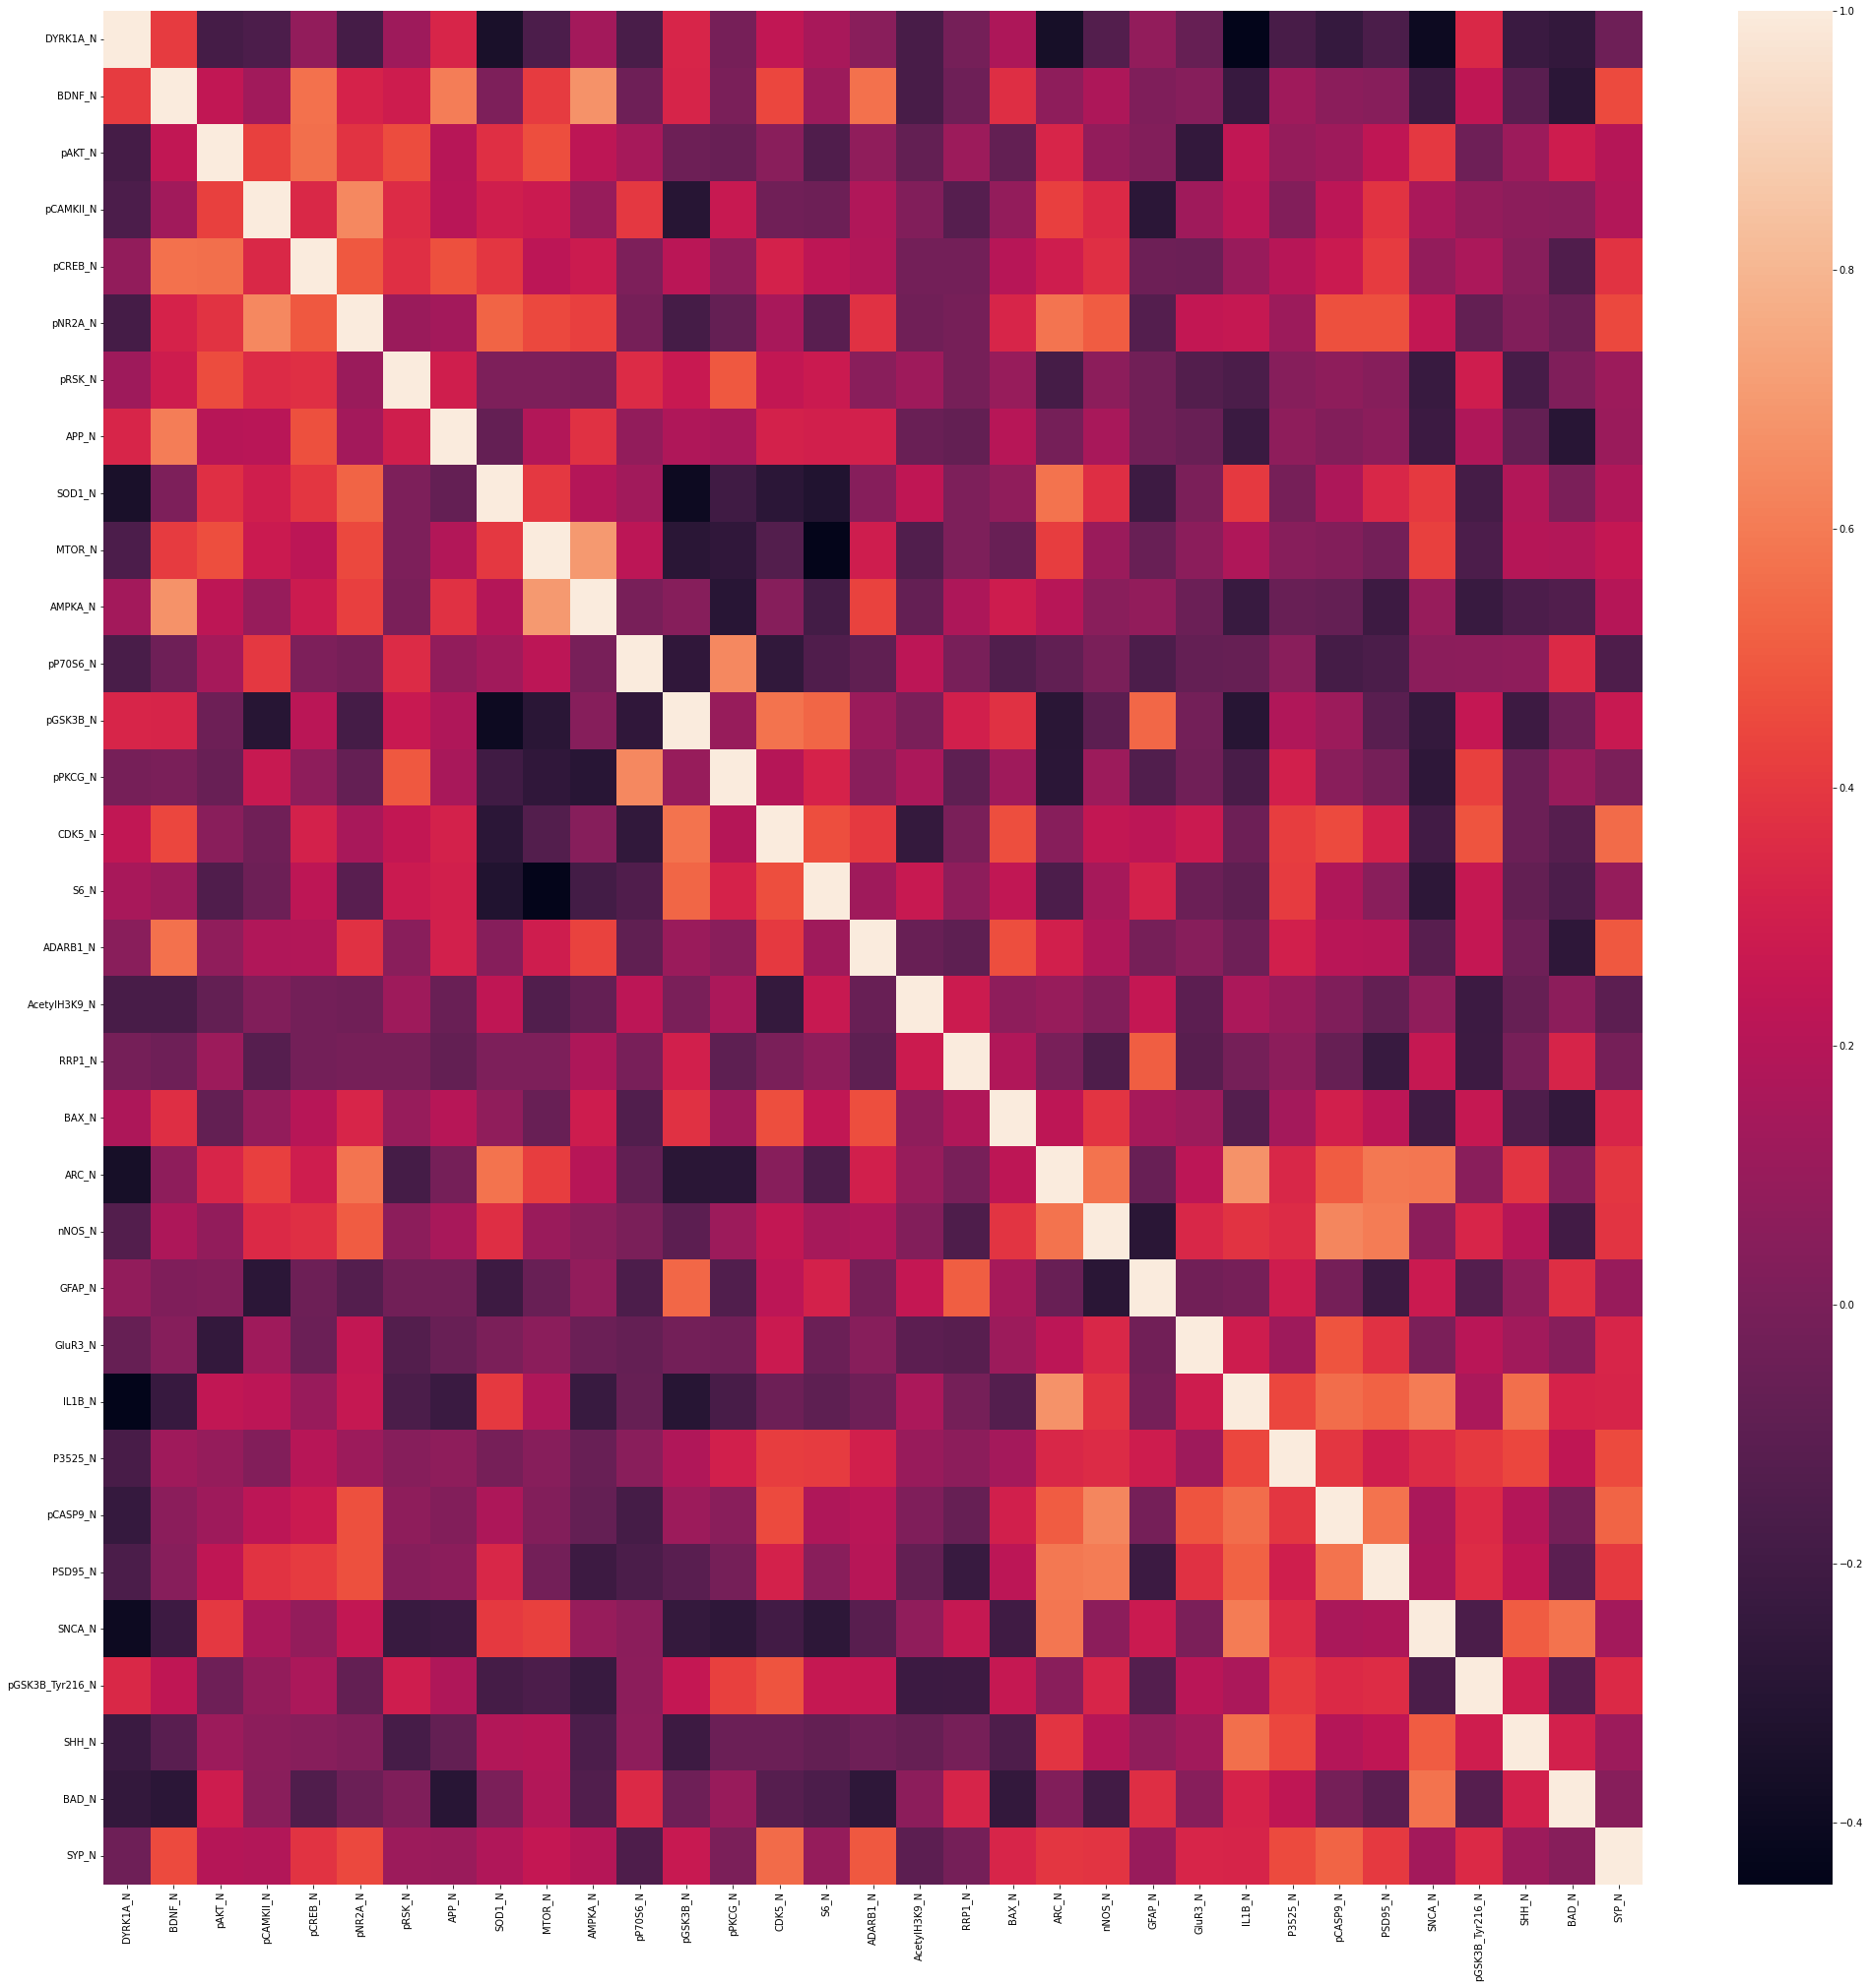

In [6]:
plt.rcParams['figure.figsize']=(feature_count,feature_count)
sns.heatmap(df.corr())
plt.show()

2 c. To check if the classes are balanced, we can use the value_counts() function to count the number of samples in each class. In this code, we print the result of value_counts() for the 'class' column. From the output, we can see that there are 50 samples in class 0 and 51 samples in class 1, so the classes are nearly balanced.

In [7]:
# Check the class distribution
print(df['Treatment_Behavior'].value_counts())


Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64


In [8]:

print(df['Genotype'].value_counts())

Control    435
Ts65Dn     327
Name: Genotype, dtype: int64


3) Develop a strategy to deal with missing variables. You can choose to impute the variable. The recommended way is to use multivariate feature imputation


In [9]:
# Load the dataset from the URL
url = 'https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv'
df = pd.read_csv(url)

# Identify variables with missing values
vars_with_missing = df.columns[df.isnull().any()].tolist()

# Choose an imputation method
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df[vars_with_missing] = imputer.fit_transform(df[vars_with_missing])

# Evaluate the imputation results
# print("Missing values after imputation:\n", df.isnull().sum())


4) Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. Remember, youhave two separate classification tasks – one is binary, the other has four classes. You may have to do somereading about multi-class classification metrics.

For the binary classification task, the following metrics could be used:

Accuracy: It measures the percentage of correctly classified samples out of the total number of samples.

Precision: It is the ratio of true positives to the total number of predicted positives. It measures how many of the predicted positive samples were actually positive.

Recall: It is the ratio of true positives to the total number of actual positives. It measures how many of the actual positive samples were correctly identified as positive.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall and provides a single metric to evaluate the performance of a binary classifier.

AUC-ROC: It is the area under the receiver operating characteristic curve. It measures the ability of the binary classifier to distinguish between positive and negative samples.

For the multi-class classification task with four classes, the following metrics could be used:

Accuracy: It measures the percentage of correctly classified samples out of the total number of samples.

Precision: It is the ratio of true positives to the total number of predicted positives for each class. It measures how many of the predicted positive samples for each class were actually positive.

Recall: It is the ratio of true positives to the total number of actual positives for each class. It measures how many of the actual positive samples for each class were correctly identified as positive.

F1 score: It is the harmonic mean of precision and recall for each class. It balances both precision and recall for each class and provides a single metric to evaluate the performance of a multi-class classifier.

Balanced accuracy: It is the average of recall for each class. It takes into account the imbalance in class distribution and provides a single metric to evaluate the overall performance of a multi-class classifier.


The choice of the best metric depends on the specific context and goals of the classification task. However, in general, the F1 score is a commonly used and reliable metric for evaluating the performance of a classifier, particularly in binary classification tasks where the classes are balanced. For imbalanced datasets or multi-class classification tasks, the balanced accuracy or F1 score weighted by class frequency could be a better choice.

However, it's important to note that no single metric can provide a complete picture of the performance of a classifier, and it's often necessary to consider multiple metrics in combination to make an informed decision. Therefore, it's recommended to evaluate the performance of a classifier using a combination of metrics such as F1 score, accuracy, and AUC-ROC.







5. Using five-fold cross-validation (you can use GridSearchCV from scikit-learn) to find the reasonable (I cannotsay “best” because you have two separate classifications to perform) hyper-parameter settings for thefollowing model types:

a. Linear SVM with regularization as hyperparameter 

b. RBF kernel SVM with kernel width and regularization as hyperparameters 

c. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number ofneurons, weight decay) [2]

d. Random forest (max tree depth, max number of variables per node) 

a. Linear SVM with regularization as hyperparameter

In [11]:
# Define a linear SVM model
svm = SVC(kernel="linear")

# Define the hyperparameters to tune over
svm_params = {"C": [0.01, 0.1, 1, 10, 100]}

# Define the grid search object, using 5-fold cross-validation and accuracy as the scoring metric
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring="accuracy")

# Fit the grid search object to the data, using all features except for "Genotype" and "Treatment_Behavior" as input and "Genotype" as the target
svm_grid.fit(df.drop(["Genotype", "Treatment_Behavior"], axis=1), df["Genotype"])

# Print the best hyperparameters found by the grid search
print("Best hyperparameters for Linear SVM:", svm_grid.best_params_)

# Save the SVM grid search object as a file named "svm_grid"

torch.save(svm_grid , "svm_grid")


Best hyperparameters for Linear SVM: {'C': 10}


b. RBF kernel SVM with kernel width and regularization as hyperparameters 

In [12]:


# Define an SVM classifier with RBF kernel
rbf_svm = SVC(kernel="rbf")

# Define a dictionary of hyperparameters to search over
rbf_svm_params = {"C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100]}

# Define a grid search object with 5-fold cross-validation and accuracy as the evaluation metric
rbf_svm_grid = GridSearchCV(rbf_svm, rbf_svm_params, cv=5, scoring="accuracy")

# Fit the grid search object to the input data and target labels
rbf_svm_grid.fit(df.drop(["Genotype", "Treatment_Behavior"], axis=1), df["Genotype"])

# Print the best hyperparameters found by the grid search
print("Best hyperparameters for RBF SVM:", rbf_svm_grid.best_params_)

# Save the trained SVM classifier object and selected hyperparameters to a file using PyTorch's `torch.save()` function
torch.save(rbf_svm_grid, 'rbf_svm_grid')


Best hyperparameters for RBF SVM: {'C': 100, 'gamma': 0.01}


c. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of neurons, weight decay)

In [14]:
df.drop(["Genotype", "Treatment_Behavior"], axis=1)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.105687,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.111272,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.110213,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.128312,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.129954,0.140940

In [13]:

# define pipeline
nn_pipe = make_pipeline(StandardScaler(), 
                         MLPClassifier(activation='relu', solver='adam', max_iter=1000, random_state=42))

 # define hyperparameters to tune
nn_param_grid = {'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (200,)],
                  'mlpclassifier__alpha': [0.0001, 0.001, 0.01]}

#perform grid search with 5-fold cross validation
nn_grid = GridSearchCV(nn_pipe, nn_param_grid, cv=5, scoring='accuracy')
nn_grid.fit(df.drop(["Genotype", "Treatment_Behavior"], axis=1), df["Genotype"])

#print best hyperparameters

print("Best hyperparameters for Neural Network: {}".format(nn_grid.best_params_))

torch.save(nn_grid, 'nn_grid')

Best hyperparameters for Neural Network: {'mlpclassifier__alpha': 0.01, 'mlpclassifier__hidden_layer_sizes': (100,)}


d. Random forest (max tree depth, max number of variables per node)

In [14]:
# Define a pipeline object that includes a random forest classifier with default parameters
rf_pipe = Pipeline([('clf', RandomForestClassifier(random_state=42))])

# Define a dictionary of hyperparameters to search over
rf_grid = {'clf__max_depth': [None, 10, 20, 30, 40], 'clf__max_features': ['sqrt', 'log2']}

# Define a grid search object with 5-fold cross-validation
rf_cv = GridSearchCV(rf_pipe, rf_grid, cv=5)

# Fit the grid search object to the input data and target labels
rf_cv.fit(df.drop(["Genotype", "Treatment_Behavior"], axis=1), df["Genotype"])

# Print the best hyperparameters and corresponding accuracy found by the grid search
print("Random Forest - Best params:", rf_cv.best_params_, "Accuracy:", rf_cv.best_score_)

# Save the trained random forest classifier object and selected hyperparameters to a file using PyTorch's `torch.save()` function
torch.save(rf_cv, 'rf_cv')


Random Forest - Best params: {'clf__max_depth': 10, 'clf__max_features': 'sqrt'} Accuracy: 0.7296267629858961


6. Check feature importance for each model to see if the same proteins are important for each model. Read upon how to find feature importance

In [78]:
# Get the best linear SVM model from the grid search
best_svm = svm_grid.best_estimator_

# Fit the model on the training data
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Genotype", "Treatment_Behavior"], axis=1), df["Genotype"], test_size=0.2, random_state=42)
best_svm.fit(X_train, y_train)

# Get the feature importance
feature_importance = np.abs(best_svm.coef_[0])
feature_importance /= np.sum(feature_importance)

# Print the feature importance
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance:.4f}")


Feature 1: 0.0060
Feature 2: 0.0548
Feature 3: 0.0042
Feature 4: 0.0137
Feature 5: 0.0006
Feature 6: 0.0152
Feature 7: 0.0034
Feature 8: 0.0017
Feature 9: 0.0151
Feature 10: 0.0023
Feature 11: 0.0010
Feature 12: 0.0020
Feature 13: 0.0228
Feature 14: 0.0039
Feature 15: 0.0233
Feature 16: 0.0082
Feature 17: 0.0261
Feature 18: 0.0050
Feature 19: 0.0124
Feature 20: 0.0126
Feature 21: 0.0327
Feature 22: 0.0095
Feature 23: 0.0087
Feature 24: 0.0038
Feature 25: 0.0154
Feature 26: 0.0036
Feature 27: 0.0015
Feature 28: 0.0109
Feature 29: 0.0581
Feature 30: 0.0008
Feature 31: 0.0796
Feature 32: 0.0087
Feature 33: 0.0012
Feature 34: 0.0269
Feature 35: 0.0009
Feature 36: 0.0017
Feature 37: 0.0320
Feature 38: 0.0177
Feature 39: 0.0140
Feature 40: 0.0318
Feature 41: 0.0165
Feature 42: 0.0313
Feature 43: 0.0120
Feature 44: 0.0113
Feature 45: 0.0125
Feature 46: 0.0064
Feature 47: 0.0044
Feature 48: 0.0102
Feature 49: 0.0126
Feature 50: 0.0051
Feature 51: 0.0076
Feature 52: 0.0098
Feature 53: 0.0019
Fe

In [19]:
from sklearn.svm import LinearSVC

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["Genotype", "Treatment_Behavior"], axis=1), df["Genotype"], test_size=0.2, random_state=42
)

# Create a pipeline with MinMaxScaler and LinearSVC
svm_pipeline = make_pipeline(MinMaxScaler(), LinearSVC())

# Fit the pipeline on the training data
svm_pipeline.fit(X_train, y_train)

# Get the feature importance
svm_weights = svm_pipeline.named_steps["linearsvc"].coef_[0]
svm_feature_importance = np.abs(svm_weights) / np.sum(np.abs(svm_weights))

# Print the feature importance
print("LinearSVC Feature Importance:")
for i, importance in enumerate(svm_feature_importance):
    print(f"Feature {i+1}: {importance:.4f}")


LinearSVC Feature Importance:
Feature 1: 0.0082
Feature 2: 0.0406
Feature 3: 0.0144
Feature 4: 0.0153
Feature 5: 0.0001
Feature 6: 0.0203
Feature 7: 0.0030
Feature 8: 0.0139
Feature 9: 0.0137
Feature 10: 0.0009
Feature 11: 0.0080
Feature 12: 0.0054
Feature 13: 0.0224
Feature 14: 0.0133
Feature 15: 0.0168
Feature 16: 0.0004
Feature 17: 0.0108
Feature 18: 0.0088
Feature 19: 0.0060
Feature 20: 0.0028
Feature 21: 0.0115
Feature 22: 0.0037
Feature 23: 0.0066
Feature 24: 0.0247
Feature 25: 0.0442
Feature 26: 0.0038
Feature 27: 0.0058
Feature 28: 0.0028
Feature 29: 0.0434
Feature 30: 0.0088
Feature 31: 0.0752
Feature 32: 0.0080
Feature 33: 0.0014
Feature 34: 0.0295
Feature 35: 0.0083
Feature 36: 0.0068
Feature 37: 0.0287
Feature 38: 0.0317
Feature 39: 0.0184
Feature 40: 0.0265
Feature 41: 0.0118
Feature 42: 0.0408
Feature 43: 0.0067
Feature 44: 0.0237
Feature 45: 0.0134
Feature 46: 0.0094
Feature 47: 0.0115
Feature 48: 0.0037
Feature 49: 0.0008
Feature 50: 0.0062
Feature 51: 0.0156
Feature 52

In [20]:
# Split the input data and target labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["Genotype", "Treatment_Behavior"], axis=1), df["Genotype"], test_size=0.2, random_state=42)

# Fit the grid search object to the training data
nn_grid.fit(X_train, y_train)

# Extract the best MLPClassifier model from the grid search
best_mlp = nn_grid.best_estimator_.named_steps['mlpclassifier']

# Get the feature importance for the MLPClassifier
mlp_weights = best_mlp.coefs_[0]
mlp_feature_importance = np.abs(mlp_weights) / np.sum(np.abs(mlp_weights), axis=0)

# Print the feature importance for the MLPClassifier
print("Feature importance for MLPClassifier:")
for i, importance in enumerate(mlp_feature_importance[0]):
    print(f"Feature {i+1}: {importance:.4f}")


Feature importance for MLPClassifier:
Feature 1: 0.0099
Feature 2: 0.0173
Feature 3: 0.0150
Feature 4: 0.0022
Feature 5: 0.0052
Feature 6: 0.0289
Feature 7: 0.0012
Feature 8: 0.0135
Feature 9: 0.0194
Feature 10: 0.0105
Feature 11: 0.0378
Feature 12: 0.0234
Feature 13: 0.0102
Feature 14: 0.0065
Feature 15: 0.0107
Feature 16: 0.0355
Feature 17: 0.0067
Feature 18: 0.0169
Feature 19: 0.0026
Feature 20: 0.0056
Feature 21: 0.0060
Feature 22: 0.0280
Feature 23: 0.0061
Feature 24: 0.0213
Feature 25: 0.0049
Feature 26: 0.0212
Feature 27: 0.0030
Feature 28: 0.0024
Feature 29: 0.0114
Feature 30: 0.0474
Feature 31: 0.0140
Feature 32: 0.0156
Feature 33: 0.0084
Feature 34: 0.0012
Feature 35: 0.0079
Feature 36: 0.0112
Feature 37: 0.0300
Feature 38: 0.0387
Feature 39: 0.0065
Feature 40: 0.0248
Feature 41: 0.0072
Feature 42: 0.0068
Feature 43: 0.0438
Feature 44: 0.0122
Feature 45: 0.0134
Feature 46: 0.0044
Feature 47: 0.0068
Feature 48: 0.0113
Feature 49: 0.0039
Feature 50: 0.0320


In [21]:
# Get the feature importances for the best random forest classifier found by the grid search
importances = rf_cv.best_estimator_['clf'].feature_importances_

# Get the feature names
features = df.drop(["Genotype", "Treatment_Behavior"], axis=1).columns

# Sort the feature importances in descending order
sorted_importances, sorted_features = zip(*sorted(zip(importances, features), reverse=True))

# Print the feature importances for the best random forest classifier found by the grid search
print("Random Forest - Feature Importance:")
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"{feature}: {importance:.4f}")

 

Random Forest - Feature Importance:
APP_N: 0.1145
ITSN1_N: 0.0541
AcetylH3K9_N: 0.0378
Tau_N: 0.0346
GluR3_N: 0.0307
pPKCG_N: 0.0260
S6_N: 0.0256
AMPKA_N: 0.0233
MTOR_N: 0.0207
P38_N: 0.0203
pMTOR_N: 0.0195
DYRK1A_N: 0.0181
NR2B_N: 0.0181
BRAF_N: 0.0179
SOD1_N: 0.0162
Ubiquitin_N: 0.0150
H3AcK18_N: 0.0150
pNUMB_N: 0.0133
CaNA_N: 0.0132
ADARB1_N: 0.0130
PSD95_N: 0.0126
pP70S6_N: 0.0123
pCREB_N: 0.0120
DSCR1_N: 0.0118
SYP_N: 0.0115
pNR1_N: 0.0113
ERK_N: 0.0112
RRP1_N: 0.0110
EGR1_N: 0.0107
pGSK3B_N: 0.0107
pCAMKII_N: 0.0105
ARC_N: 0.0104
pAKT_N: 0.0101
pCASP9_N: 0.0099
P3525_N: 0.0094
pERK_N: 0.0091
pRSK_N: 0.0091
RAPTOR_N: 0.0091
RSK_N: 0.0089
TRKA_N: 0.0087
NR1_N: 0.0085
pS6_N: 0.0084
CAMKII_N: 0.0084
TIAM1_N: 0.0083
BCL2_N: 0.0082
BDNF_N: 0.0081
pELK_N: 0.0081
AKT_N: 0.0080
GFAP_N: 0.0079
pJNK_N: 0.0077
pGSK3B_Tyr216_N: 0.0073
pPKCAB_N: 0.0073
NR2A_N: 0.0073
ERBB4_N: 0.0072
IL1B_N: 0.0071
nNOS_N: 0.0070
pNR2B_N: 0.0068
GSK3B_N: 0.0067
pCFOS_N: 0.0066
SHH_N: 0.0066
BAX_N: 0.0064
pNR2A_

7. See if removing some features systematically will improve your models (e.g. using recursive feature elimination https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html). 

In [23]:
# Load the data into a Pandas dataframe
data = df
# Separate the target variable from the features
X = data.drop(labels=["Genotype", "Treatment_Behavior"], axis=1)

y = datay = data[["Genotype", "Treatment_Behavior"]]


# Create a Random Forest classifier
rf = RandomForestClassifier()

# Use RFE to select the most important features
rfe = RFE(estimator=rf, n_features_to_select=5, step=1)
X_rfe = rfe.fit_transform(X, y)

# Print the selected feature names
print(X.columns[rfe.support_])


Index(['pERK_N', 'APP_N', 'SOD1_N', 'pNUMB_N', 'pPKCG_N'], dtype='object')


8. Finally, test a few promising models on the test data:
https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv

In [24]:
print(X.columns[rfe.support_])

Index(['pERK_N', 'APP_N', 'SOD1_N', 'pNUMB_N', 'pPKCG_N'], dtype='object')


In [25]:

url_2 = 'https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv'
df_2 = pd.read_csv(url_2)

# Identify variables with missing values
vars_with_missing = df_2.columns[df_2.isnull().any()].tolist()

# Choose an imputation method
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df_2[vars_with_missing] = imputer.fit_transform(df_2[vars_with_missing])


# Load the train and test data
train_data = df
test_data = df_2


X_train = train_data.drop(["Genotype", "Treatment_Behavior"], axis=1)
y_train = train_data[["Genotype", "Treatment_Behavior"]]
y_train = y_train.iloc[:, 0] # extract the first column as a Series
# Train a Random Forest classifier on the train data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


# Train an SVM classifier on the train data
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Separate the target variable from the features for the test data
X_test = test_data.drop(["Genotype", "Treatment_Behavior"], axis=1)
y_test = test_data[["Genotype", "Treatment_Behavior"]]


X_train = train_data.drop(["Genotype", "Treatment_Behavior"], axis=1)
y_train = train_data[["Genotype", "Treatment_Behavior"]]



# Make predictions on the test data using the Random Forest classifier
rf_predictions = rf_classifier.predict(X_test)
# Extract the Genotype column from y_test
y_test_genotype = y_test["Genotype"]
rf_accuracy = accuracy_score(y_test_genotype, rf_predictions)
print("Random Forest accuracy:", rf_accuracy)

# Split the y_test variable into two separate variables
y_test_genotype = y_test["Genotype"]
y_test_treatment = y_test["Treatment_Behavior"]

y_train_genotype = y_train["Genotype"]
y_train_treatment = y_train["Treatment_Behavior"]

# Create separate SVM classifiers for each variable
svm_genotype_classifier = SVC(kernel='linear')
svm_treatment_classifier = SVC(kernel='linear')

# Fit the classifiers on the training data
svm_genotype_classifier.fit(X_train, y_train_genotype)
svm_treatment_classifier.fit(X_train, y_train_treatment)

# Make predictions on the test data using the classifiers
svm_genotype_predictions = svm_genotype_classifier.predict(X_test)
svm_treatment_predictions = svm_treatment_classifier.predict(X_test)

# Calculate the accuracy scores for each variable
svm_genotype_accuracy = accuracy_score(y_test_genotype, svm_genotype_predictions)
svm_treatment_accuracy = accuracy_score(y_test_treatment, svm_treatment_predictions)

print("SVM Genotype accuracy:", svm_genotype_accuracy)
print("SVM Treatment_Behavior accuracy:", svm_treatment_accuracy)



Random Forest accuracy: 0.7155555555555555
SVM Genotype accuracy: 0.7777777777777778
SVM Treatment_Behavior accuracy: 0.7866666666666666


Objective 2: Practice using pre-trained neural networks to extract domain-specific features for new tasks.

9. Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor” from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and you can ignore “finetuning theConvNet”. Test this code out to see if it runs properly in your environment after eliminating code blocks that you do not need. 

In [26]:
%matplotlib inline

In [22]:
# Define data augmentation and normalization transformations for training and validation data
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  # randomly crop and resize images to 224x224 pixels
        transforms.RandomHorizontalFlip(),  # randomly flip images horizontally
        transforms.ToTensor(),  # convert images to PyTorch tensors
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # normalize images
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),  # resize images to 256x256 pixels
        transforms.CenterCrop(224),  # center-crop images to 224x224 pixels
        transforms.ToTensor(),  # convert images to PyTorch tensors
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # normalize images
    ]),
}

# Set the path to the image data directory
data_dir = 'data\\hymenoptera_data'

# Create PyTorch ImageFolder datasets for the training and validation sets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}

# Create PyTorch data loaders for the training and validation sets
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

# Get the number of images in the training and validation sets
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

# Get the class names (e.g. ant, bee)
class_names = image_datasets['train'].classes

# Set the device to use for training (GPU if available, CPU otherwise)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Get the dataset of images for the training set (this line is not needed and can be removed)
imag_dataset = dataloaders['train']


In [23]:
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 244
    Root location: data\hymenoptera_data\train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

10. Write a function that outputs ResNet18 features for a given input image. Extract features for training images
(in image_datasets['train']). You should get an Nx512 dimensional array.

In [72]:
def get_images_features(image_datasets):
    # Define a data loader for the given image datasets
    loader = torch.utils.data.DataLoader(image_datasets,
                                         batch_size=4, shuffle=True, num_workers=8)
    
    # Load a pre-trained ResNet-18 model
    model_ft = models.resnet18(pretrained=True)
    
    # Set the model to training mode
    model_ft.train()
    
    # Get the number of input features for the fully connected layer
    num_ftrs = model_ft.fc.in_features
    
    # Replace the fully connected layer with a new one that outputs 512 features
    model_ft.fc = nn.Linear(num_ftrs, 512)
    
    # Initialize outputs and labels tensors
    outputs = None
    y =  None
    
    # Iterate over the batches of data
    for inputs , labels in loader :
        # Enable gradient calculation
        with torch.set_grad_enabled(True):
            # Forward pass through the ResNet-18 model
            x = model_ft(inputs)
            
            # Concatenate the outputs and labels across batches
            if outputs is None :
                outputs = x
                y = labels 
            else :
                outputs = torch.cat((x, outputs), dim=0)
                y = torch.cat((y, labels), dim = 0)
    
    # Return the concatenated outputs and labels
    return outputs, y  


In [73]:
x_train , y_train = get_images_features(image_datasets['train'])


C:\Users\raush\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\raush\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [74]:
x_val , y_val = get_images_features(image_datasets['val'])


In [75]:
x_test = x_train.detach().numpy()
y_test = y_train.detach().numpy()
x_valid = x_val.detach().numpy()
y_valid = y_val.detach().numpy()

11. Compare L2 regularized logistic regression, RBF kernel SVM (do grid search on kernel width and
regularization), and random forest (do grid search on max depth and number of trees). Test the final model
on test data and show the results -- accuracy and F1 score.

In [76]:

# Train a Random Forest classifier on the train data
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier.fit(x_test, y_test)
rf_predictions = rf_classifier.predict(x_valid)

# Make predictions on the test data using the Random Forest classifier
rf_accuracy = accuracy_score(y_valid, rf_predictions)
print("Random Forest accuracy:", rf_accuracy)
f1 = f1_score(y_valid, rf_predictions, average='weighted')
print('F1 score RF:', f1)

# Train an SVM classifier on the train data
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_test, y_test)

# Make predictions on the test data using the classifiers
svm_prediction = svm_classifier.predict(x_valid)

# Calculate the accuracy scores for each variable
svm_accuracy = accuracy_score(y_valid, svm_prediction)

print("SVM accuracy:", svm_accuracy)

f1 = f1_score(y_valid, svm_prediction, average='weighted')
print('F1 score SVM:', f1)


Random Forest accuracy: 0.5228758169934641
F1 score RF: 0.5099166254246469
SVM accuracy: 0.45098039215686275
F1 score SVM: 0.4388696655132642


In [77]:
clf = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=1000)
clf.fit(x_test, y_test)
y_pred = clf.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy:', accuracy)


f1 = f1_score(y_valid, y_pred, average='weighted')
print('F1 score:', f1)



Accuracy: 0.5424836601307189
F1 score: 0.38157748975296335


12. Summarize your findings and write your references. 

for question number 2, I copied " sns.heatmap(df.corr())
plt.show() "  from https://seaborn.pydata.org/generated/seaborn.heatmap.html

I refered
https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

for question no.3 I refered https://scikit-learn.org/stable/modules/impute.html

for question no.5 I refered https://scikit-learn.org/stable/modules/grid_search.html and modefied this portion "param_grid = {'max_depth': [3, 5, 10],
...               'min_samples_split': [2, 5, 10]}

>>> base_estimator = RandomForestClassifier(random_state=0)

>>> X, y = make_classification(n_samples=1000, random_state=0)

>>> sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,

...                          factor=2, resource='n_estimators',

...                          max_resources=30).fit(X, y)"

https://stackoverflow.com/questions/56310965/what-value-is-returned-in-a-grid-search-score

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

for question no.6   https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

for question no.7 https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

for question no.8  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    
    https://www.kaggle.com/code/prashant111/svm-classifier-tutorial 

for question no.9 and 10 https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

for question no.11  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

I discussed problem number 9 and 10 of this assignment with Soutrik Sarangi(20b090014) 